In [1]:
import io
from IPython.nbformat import current

def execute_notebook(nbfile):
    
    with io.open(nbfile) as f:
        nb = current.read(f, 'json')
    
    ip = get_ipython()
    
    for cell in nb.worksheets[0].cells:
        if cell.cell_type != 'code':
            continue
        ip.run_cell(cell.input)


C:\ProgramData\Anaconda3\envs\mokshtech\lib\site-packages\IPython\nbformat.py:12: ShimWarning: The `IPython.nbformat` package has been deprecated since IPython 4.0. You should import from nbformat instead.
  warn("The `IPython.nbformat` package has been deprecated since IPython 4.0. "
C:\ProgramData\Anaconda3\envs\mokshtech\lib\site-packages\nbformat\current.py:15: UserWarning: nbformat.current is deprecated.

- use nbformat for read/write/validate public API
- use nbformat.vX directly to composing notebooks of a particular version

  warnings.warn("""nbformat.current is deprecated.


In [2]:
execute_notebook("util.ipynb")


C:\Users\sanjo\PycharmProjects\mokshtech\stock_predictor\optionvaluecalculation\strategies
['.ipynb_checkpoints', 'BANKNIFTYmonthly_option_buy_Bhavcopy_Pandl.csv', 'BANKNIFTYmonthly_option_buy_nsepy_Pandl.csv', 'df.csv', 'forwordvolatility.py', 'input.csv', 'monthlyoptionbuying-addingsellleg.ipynb', 'monthlyoptionbuying.ipynb', 'monthy_nifty_option_buy_Bhavcopy_Pandl.csv', 'monthy_nifty_option_buy_nsepy_Pandl.csv', 'NIFTY.csv', 'optionPriceTrendAnalysis.ipynb', 'preDefinedStrategies', 'straddle.py', 'strategies.py', 'util.ipynb', 'util.py', 'weeklyOptionBuy.ipynb', 'weeklyOptionBuy_Selladditon.ipynb', 'weekly_banknifty_option_buy_Pandl.csv', 'weekly_nifty_option_buy_Pandl.csv', '__init__.py']
2020-01-30 00:00:00


15.161499999999998

In [3]:
    def monthlyOptionBuyusingNsePy():
        print(os.getcwd())
        print(os.listdir())

        banknifty = pd.DataFrame()
        formatted_banknifyt_df = pd.DataFrame(['Year_month','P&L'])
        month_profit_loss = pd.DataFrame()

        delta = relativedelta(years=+1)
        #monthly_expirty_date =getMonthlyExpirtyFromBahvcopy()
        #monthly_expirty_date = getMonthlyExpirtyDate()
        #print("monthly_expirty_date",monthly_expirty_date)
        year_month_list =[]
        p_N_L_list =[]
        cum_p_N_L_list =[]
        slipage = 5
        P_N_L_dic =  {}
        # code using nsepy to make sure its bhavcopy is giving matching result

        banknifty = pd.DataFrame()
        tradebook = TradeBook()
        for current_expiry_date in  expiry_list:
            print(current_expiry_date)
            try:
                val =0
                expiry_day = datetime.datetime.strptime(current_expiry_date,'%Y-%m-%d')
                today_date =datetime.datetime.strptime( str(date.today()),'%Y-%m-%d')
                if expiry_day < today_date:
                    #print(expiry_day)
                    first_day_of_the_month = expiry_day.replace(day=1)
                    first_day_of_the_month =checkfirstTradyingDayofMonth(first_day_of_the_month,expiry_day)
                    #print(first_day_of_the_month)
                    nifty_fut = nsepy.get_history(symbol=symbol,
                                        start=first_day_of_the_month,
                                        end=first_day_of_the_month,
                                        index=True,
                                        futures=True,
                                        expiry_date=expiry_day)
                    strike_price = (nifty_fut['Open']- (nifty_fut['Open'])%100).astype(float).min()
                    #print(strike_price)
                    fifteen_day_of_the_month = expiry_day.replace(day=15)
                    #print("fifteen_day_of_the_month",fifteen_day_of_the_month)

                    fifteen_day_of_the_month =checkfirstTradyingDayofMonth(fifteen_day_of_the_month,expiry_day)
                    fifteen_day_of_the_month =expiry_day

                    buy_opt_ce = nsepy.get_history(symbol=symbol,
                                        start=first_day_of_the_month,
                                        end=first_day_of_the_month,
                                        index=True,
                                        option_type='CE',
                                        strike_price=strike_price,
                                        expiry_date=expiry_day)




                    buy_opt_pe = nsepy.get_history(symbol=symbol,
                                        start=first_day_of_the_month,
                                        end=first_day_of_the_month,
                                        index=True,
                                        option_type='PE',
                                        strike_price=strike_price,
                                        expiry_date=expiry_day)
                   

                    sell_opt_ce = nsepy.get_history(symbol=symbol,
                                        start=fifteen_day_of_the_month,
                                        end=fifteen_day_of_the_month,
                                        index=True,
                                        option_type='CE',
                                        strike_price=strike_price,
                                        expiry_date=expiry_day)
                    sell_opt_pe = nsepy.get_history(symbol=symbol,
                                        start=fifteen_day_of_the_month,
                                        end=fifteen_day_of_the_month,
                                        index=True,
                                        option_type='PE',
                                        strike_price=strike_price,
                                        expiry_date=expiry_day)
                    
                    vixsma= getVixData(first_day_of_the_month)
                    strikeadditon =500
                    if vixsma> 15:
                        strikeadditon =1000
                    
                    
                    add_leg_opt_pe_sell = nsepy.get_history(symbol=symbol,
                                        start=first_day_of_the_month,
                                        end=first_day_of_the_month,
                                        index=True,
                                        option_type='PE',
                                        strike_price=strike_price-strikeadditon,
                                        expiry_date=expiry_day)
                    add_leg_opt_pe_buy = nsepy.get_history(symbol=symbol,
                                        start=fifteen_day_of_the_month,
                                        end=fifteen_day_of_the_month,
                                        index=True,
                                        option_type='PE',
                                        strike_price=strike_price-strikeadditon,
                                        expiry_date=expiry_day)
                    add_leg_opt_ce_sell = nsepy.get_history(symbol=symbol,
                                        start=first_day_of_the_month,
                                        end=first_day_of_the_month,
                                        index=True,
                                        option_type='CE',
                                        strike_price=strike_price+strikeadditon,
                                        expiry_date=expiry_day)
                    add_leg_opt_ce_buy = nsepy.get_history(symbol=symbol,
                                        start=fifteen_day_of_the_month,
                                        end=fifteen_day_of_the_month,
                                        index=True,
                                        option_type='CE',
                                        strike_price=strike_price+strikeadditon,
                                        expiry_date=expiry_day)


                    tradebook.addTradeLeg(buy_opt_ce,1,True)
                    tradebook.addTradeLeg(sell_opt_ce,1,True)
                    tradebook.addTradeLeg(buy_opt_pe,2,True)
                    tradebook.addTradeLeg(sell_opt_pe,2,True)
                    tradebook.addTradeLeg(add_leg_opt_pe_sell,3,False)
                    tradebook.addTradeLeg(add_leg_opt_pe_buy,3,False)
                    tradebook.addTradeLeg(add_leg_opt_ce_sell,4,False)
                    tradebook.addTradeLeg(add_leg_opt_ce_buy,4,False)


                    

            except Exception as error:
                print("File not found {0}".format(error))
       
        tradebook.printTradeBook()
        tradebook.calcualteMonthProfitLoss()
        #print(tradebook.month_profit_loss.Total_PandL.sum())
        #print(month_profit_loss.Total_PandL)
        #print(tradebook.month_profit_loss.groupby('Sell_date').agg({'Total_PandL' :sum}))
        month_profit_loss=tradebook.month_profit_loss
        return month_profit_loss



C:\Users\sanjo\PycharmProjects\mokshtech\stock_predictor\optionvaluecalculation\strategies
['.ipynb_checkpoints', 'BANKNIFTYmonthly_option_buy_Bhavcopy_Pandl.csv', 'BANKNIFTYmonthly_option_buy_nsepy_Pandl.csv', 'df.csv', 'forwordvolatility.py', 'input.csv', 'monthlyoptionbuying-addingsellleg.ipynb', 'monthlyoptionbuying.ipynb', 'monthy_nifty_option_buy_Bhavcopy_Pandl.csv', 'monthy_nifty_option_buy_nsepy_Pandl.csv', 'NIFTY.csv', 'optionPriceTrendAnalysis.ipynb', 'preDefinedStrategies', 'straddle.py', 'strategies.py', 'util.ipynb', 'util.py', 'weeklyOptionBuy.ipynb', 'weeklyOptionBuy_Selladditon.ipynb', 'weekly_banknifty_option_buy_Pandl.csv', 'weekly_nifty_option_buy_Pandl.csv', '__init__.py']
2021-01-28
2021-02-25
2021-03-25
2021-04-29
printing tradebook-Long
               Symbol      Expiry Option Type  Strike Price     Open     High      Low  ...  Number of Contracts      Turnover  Premium Turnover  Open Interest  Change in OI  Underlying  Match_Id
Date                              

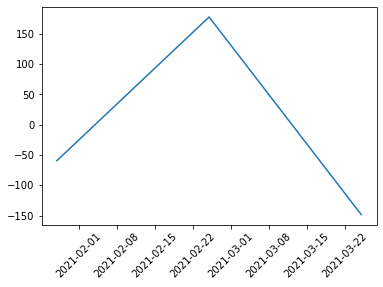

In [4]:

    month_profit_loss_main =monthlyOptionBuyusingNsePy()
    
    #print(month_profit_loss_main)
    
    month_profit_loss= month_profit_loss_main.groupby('Sell_date').agg({'Total_PandL' :sum})
    #print("----Monthly---------")
    #print(month_profit_loss)
    plt.xticks(rotation=45)
    month_profit_loss['Cum_PandL'] = month_profit_loss['Total_PandL'].cumsum()
    #print("----Monthly After cumsum---------")
    #print(month_profit_loss)
    plt.plot(month_profit_loss.index , month_profit_loss['Cum_PandL'])
    plt.show()
    pandlFile =str(symbol)+"monthly_option_buy_nsepy_Pandl.csv"
    month_profit_loss.to_csv(pandlFile)

In [5]:
amount = 400000
sellonelotamountperunit = 1000


month_profit_loss_main["amount_to_invest"] = amount
test =dict()
forTest = month_profit_loss_main

month_profit_loss_group= month_profit_loss_main.groupby(['Sell_date','Trade_Type'])
for name , group in month_profit_loss_group:
    #print(name[1])
    #print(group)
    if name[1]=='Long':
       
        #print ("in long")
        totalprice = group['Buy_Price'].sum()
        #print(totalprice)
        #print("Totalunit",int(amount/(totalprice+sellonelotamountperunit)))
        test.update({name[0]:[name[0],int(amount/(totalprice+sellonelotamountperunit))]})
             
#print(test)
test1 =pd.DataFrame(test)
test1= test1.transpose()
test1.columns = ['Sell_date','Units']


month_profit_loss_main =pd.merge(month_profit_loss_main, test1, on = 'Sell_date', how = "outer")
#print(month_profit_loss_main)


#month_profit_loss_main["Total_PandL_for_all_contracts"] = month_profit_loss_main.apply(lambda x: (x.Total_PandL*x.Units*sellonelotamountperunit)if x.Trade_Type=='Short' else (x.Total_PandL*x.Units), axis=1)
month_profit_loss_main["Total_PandL_for_all_contracts"] = month_profit_loss_main.apply(lambda x:x.Total_PandL*x.Units, axis=1)
#print("Total")
#print(month_profit_loss_main)
#print(month_profit_loss_main["Total_PandL_for_all_contracts"].sum().astype(float))

month_profit_loss_main['Year_month'] = pd.to_datetime(month_profit_loss_main['Sell_date']).dt.strftime('%Y')
print(month_profit_loss_main.groupby('Year_month')["Total_PandL_for_all_contracts"].sum().astype(float))
print(len(month_profit_loss_main.groupby('Year_month')))
result =cagr(amount,month_profit_loss_main["Total_PandL_for_all_contracts"].sum().astype(float),len(month_profit_loss_main.groupby('Year_month')))
print("{:.2%}".format(result))




Year_month
2021   -14946.35
Name: Total_PandL_for_all_contracts, dtype: float64
1
-3.74%



NIFTY2021.csv
Strile price is  14000
0.2 310.0 186.4 299.75
pandl -423.15 21.1575
pandl -444.3075
Strile price is  13700
1400.35 461.65 0.1 330.25
pandl 608.55 30.4275
pandl 578.1225
inlistelse  0
Strile price is  14700
0.15 388.5 358.9 422.2
pandl -451.65000000000003 22.5825
pandl -474.2325
inlistelse  -444.3075
Strile price is  14800
140.3 335.7 292.05 282.7
pandl -186.04999999999995 9.302499999999998
pandl -195.35249999999996
inlistelse  133.81499999999994
r C:/Users/sanjo/PycharmProjects/mokshtech/stock_predictor/database/optionData\NIFTY2021.csv
[-444.3075, 578.1225, -474.2325, -195.35249999999996]
[-444.3075, 133.81499999999994, -340.4175000000001, -535.77]

2021-01-28 00:00:00
2021-01-01 00:00:00
14000.0
0.2 310.0 186.4 299.75
pandl -444.3075
2021-02-25 00:00:00
2021-02-01 00:00:00
13700.0
1400.35 461.65 0.1 330.25
pandl 578.1225
inlistelse  0
2021-03-25 00:00:00
2021-03-01 00:00:00
14700.0
0.15 388.5 358.9 422.2
pandl -474.2325
inlistelse  0
2021-04-29 00:00:00
2021-04-01 00:00:00
14800.0
File not found positional indexers are out-of-bounds
[-444.3075, 578.1225, -474.2325]
[-444.3075, 133.81499999999994, -340.4175000000001]


In [6]:
month_profit_loss_main.loc[month_profit_loss_main["Total_PandL_for_all_contracts"] ==month_profit_loss_main["Total_PandL_for_all_contracts"].max()]

,Buy_date,Sell_date,Strike_price,Buy_Price,Sell_Price,Trade_Type,Option Type,Total_PandL,amount_to_invest,Units,Total_PandL_for_all_contracts,Year_month
4,2021-02-01,2021-02-25,30900.0,1136.3,5814.75,Long,CE,4678.45,400000,129,603520.05,2021


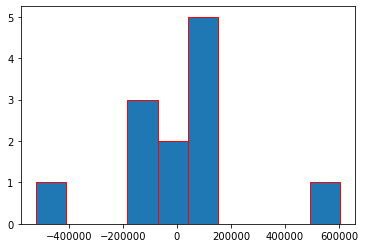

In [7]:
plt.hist(month_profit_loss_main["Total_PandL_for_all_contracts"], edgecolor="red", bins=10)
plt.show()

In [8]:
 month_profit_loss_main['Total_PandL'].sum()

-148.54999999999995

In [9]:
today = str(date.today())
print("Today's date:", today)


Today's date: 2021-04-24


In [10]:
unit = 135
print(1946*unit)
print(1000*unit)
print(unit/75)
print(unit/75*75000)


262710
135000
1.8
135000.0


In [11]:
test =month_profit_loss_main
test['Y_M'] = pd.to_datetime(month_profit_loss_main['Sell_date']).dt.strftime('%Y-%m')
print(test.groupby(['Y_M','Trade_Type'])["Total_PandL_for_all_contracts"].sum().astype(float))
print(test)

Y_M      Trade_Type
2021-01  Long         -155486.25
         Short         147480.75
2021-02  Long          479499.45
         Short        -448881.30
2021-03  Long          -84151.25
         Short          46592.25
Name: Total_PandL_for_all_contracts, dtype: float64
      Buy_date   Sell_date  Strike_price  Buy_Price  Sell_Price Trade_Type Option Type  Total_PandL  amount_to_invest Units  Total_PandL_for_all_contracts Year_month      Y_M
0   2021-01-01  2021-01-28       31200.0    1008.20        0.10       Long          CE     -1008.10            400000   135                     -136093.50       2021  2021-01
1   2021-01-01  2021-01-28       31200.0     938.35      794.70       Long          PE      -143.65            400000   135                      -19392.75       2021  2021-01
2   2021-01-01  2021-01-28       32200.0     591.70        0.25      Short          CE       591.45            400000   135                       79845.75       2021  2021-01
3   2021-01-01  2021-01-28    

first_day_of_the_month = datetime.date(2017, 9, 1)
lastday = datetime.date(2017, 9, 28)
symbol = 'BANKNIFTY'
nifty_fut = nsepy.get_history(symbol=symbol,
                                        start=first_day_of_the_month,
                                        end=lastday,
                                        index=True,
                                        futures=True,
                                        expiry_date=lastday)
print(nifty_fut)
nifty_fut['Close'].plot()    

In [13]:
gkk = month_profit_loss_main.groupby(["Trade_Type"])
print(gkk['Total_PandL'].sum())
for name ,group in gkk:
    print(group)


Trade_Type
Long     1833.55
Short   -1982.10
Name: Total_PandL, dtype: float64
     Buy_date   Sell_date  Strike_price  Buy_Price  Sell_Price Trade_Type Option Type  Total_PandL  amount_to_invest Units  Total_PandL_for_all_contracts Year_month      Y_M
0  2021-01-01  2021-01-28       31200.0    1008.20        0.10       Long          CE     -1008.10            400000   135                     -136093.50       2021  2021-01
1  2021-01-01  2021-01-28       31200.0     938.35      794.70       Long          PE      -143.65            400000   135                      -19392.75       2021  2021-01
4  2021-02-01  2021-02-25       30900.0    1136.30     5814.75       Long          CE      4678.45            400000   129                      603520.05       2021  2021-02
5  2021-02-01  2021-02-25       30900.0     961.50        0.10       Long          PE      -961.40            400000   129                     -124020.60       2021  2021-02
8  2021-03-01  2021-03-25       35300.0    1193.80 

In [ ]:
month_profit_loss_main['Total_PandL_for_all_contracts'].cumsum()